In [4]:
#col marked 2 is mass
#col marked 5 is virial radius
#col marked 6 is scale radius


import pandas as pd

file_path = 'sim_000'

# Reading the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Extracting the columns labeled as '2', '5', and '6'
selected_columns = df[['2', '5', '6']]

print(selected_columns)


                  2        5        6
0      3.258200e+13  646.047   89.716
1      4.899600e+13  740.159  126.067
2      5.375600e+13  763.392  262.639
3      4.620500e+13  725.833  188.418
4      6.696900e+13  821.417  303.187
...             ...      ...      ...
67628  3.044800e+13  631.624   76.610
67629  3.028400e+13  630.487  235.447
67630  3.323800e+13  650.357  109.424
67631  3.126900e+13  637.248  113.642
67632  3.028400e+13  630.487  127.731

[67633 rows x 3 columns]


In [8]:
conc = df['5'].values / df['6'].values
print(conc)

[7.20102323 5.87115581 2.90662088 ... 5.94345847 5.60750427 4.93605311]


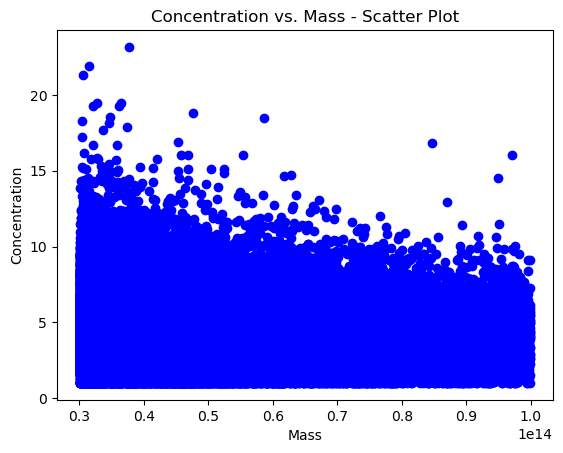

In [10]:
import matplotlib.pyplot as plt

# Creating a scatter plot
plt.scatter(df['2'].values, conc, marker='o', color='b')

# Setting labels and title
plt.xlabel('Mass')
plt.ylabel('Concentration')
plt.title('Concentration vs. Mass - Scatter Plot')

plt.show()

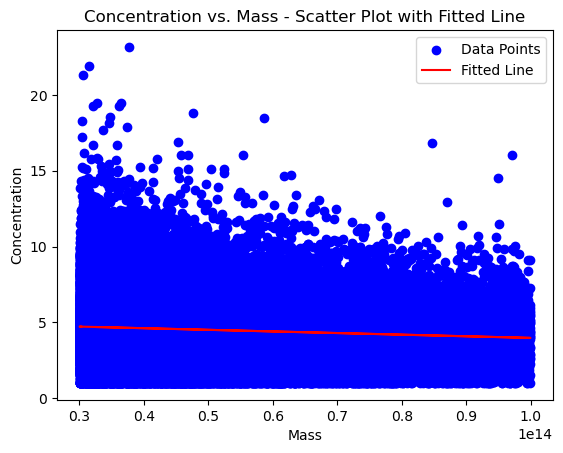

In [12]:
import numpy as np

# Fitting a straight line (linear regression)
slope, intercept = np.polyfit(df['2'].values, conc, 1)

# Creating a scatter plot
plt.scatter(df['2'].values, conc, marker='o', color='b', label='Data Points')

# Plotting the fitted line
plt.plot(df['2'].values, slope * df['2'].values + intercept, color='r', label='Fitted Line')

# Setting labels and title
plt.xlabel('Mass')
plt.ylabel('Concentration')
plt.title('Concentration vs. Mass - Scatter Plot with Fitted Line')

plt.legend()

plt.show()

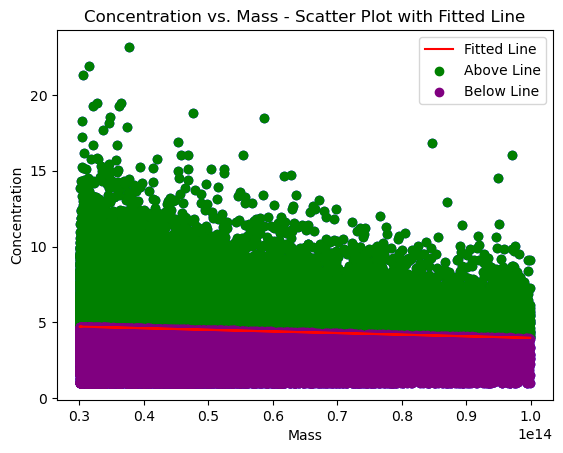

In [14]:
# Calculating the y values on the fitted line for each x value
fitted_line = slope * df['2'].values + intercept

# Separating points above and below the best fit line
above_line = df[conc > fitted_line]
below_line = df[conc < fitted_line]


# Creating a scatter plot
plt.scatter(df['2'].values, conc, marker='o', color='b')

# Plotting the fitted line
plt.plot(df['2'].values, fitted_line, color='r', label='Fitted Line')

# Highlighting points above the line
plt.scatter(above_line['2'].values, above_line['5'].values / above_line['6'].values, color='g', label='Above Line')

# Highlighting points below the line
plt.scatter(below_line['2'].values, below_line['5'].values / below_line['6'].values, color='purple', label='Below Line')

# Setting the labels and title
plt.xlabel('Mass')
plt.ylabel('Concentration')
plt.title('Concentration vs. Mass - Scatter Plot with Fitted Line')

plt.legend()

plt.show()

In [15]:
# Save above_line and below_line to separate CSV files
above_line.to_csv('high_concentration_halos_sim000.csv', index=False)
below_line.to_csv('low_concentration_halos_sim000.csv', index=False)

In [34]:
df = pd.read_csv('high_concentration_halos_sim000.csv')

# Extracting columns by name
selected_columns = df[['8', '9', '10']]



# Converting the selected columns to a NumPy array
numpy_array = selected_columns.to_numpy()

# Display the NumPy array
print(numpy_array)

[[466.26498 152.42139 125.10744]
 [117.1914  230.1382  244.27373]
 [442.18073 261.15732 221.88893]
 ...
 [705.17987 768.59833 822.46655]
 [990.15631 590.56061 871.62897]
 [544.0694  981.60773 874.04144]]


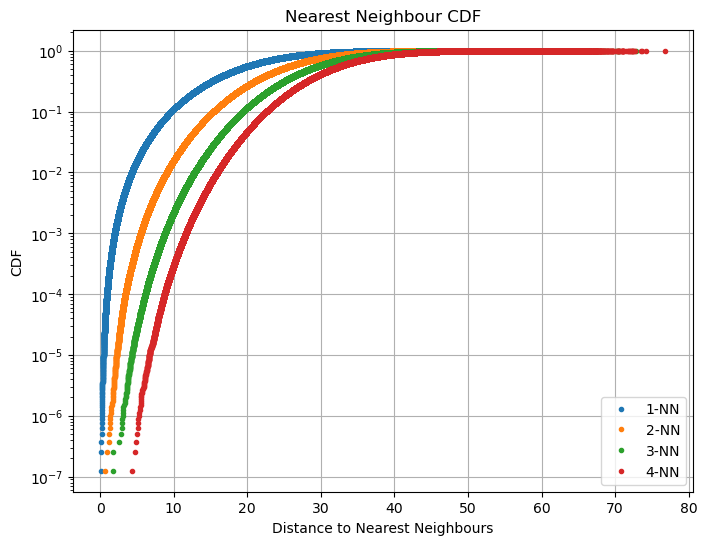

In [35]:
from scipy.spatial import cKDTree

tree = cKDTree(numpy_array)
num_query_points = 200**3
box_size = 1e3
query_points = np.random.uniform(0, box_size, (num_query_points, 3))
cumulative_prob = np.arange(1, num_query_points + 1) / num_query_points

plt.figure(figsize=(8, 6))

for k in range(1,5):
    if k==1:
        distances, _ = tree.query(query_points, k=k)
        sorted_distances = np.sort(distances[:])
        plt.plot(sorted_distances, cumulative_prob, marker='.', linestyle='none', label=f"{k}-NN")
    else:
        distances, _ = tree.query(query_points, k=k)
        sorted_distances = np.sort(distances[:,k-1])  # k-1 to access the k-NN distance
        plt.plot(sorted_distances, cumulative_prob, marker='.', linestyle='none', label=f"{k}-NN")

plt.xlabel("Distance to Nearest Neighbours")
plt.yscale('log')
plt.ylabel("CDF")
plt.title("Nearest Neighbour CDF")
plt.legend()
plt.grid()
plt.show()

In [41]:
df_low = pd.read_csv('low_concentration_halos_sim000.csv')

# Extracting columns by name
selected_columns_low = df_low[['8', '9', '10']]


# Converting the selected columns to a NumPy array
numpy_array_low = selected_columns_low.to_numpy()

# Displaying the NumPy array
print(numpy_array_low)

[[341.03577  63.59193 121.51032]
 [241.32193  86.37991 243.17255]
 [241.55429  87.18789 246.10748]
 ...
 [978.07855 930.94415 873.60156]
 [586.37518 689.46332 865.71667]
 [933.05115 540.86707 927.93011]]


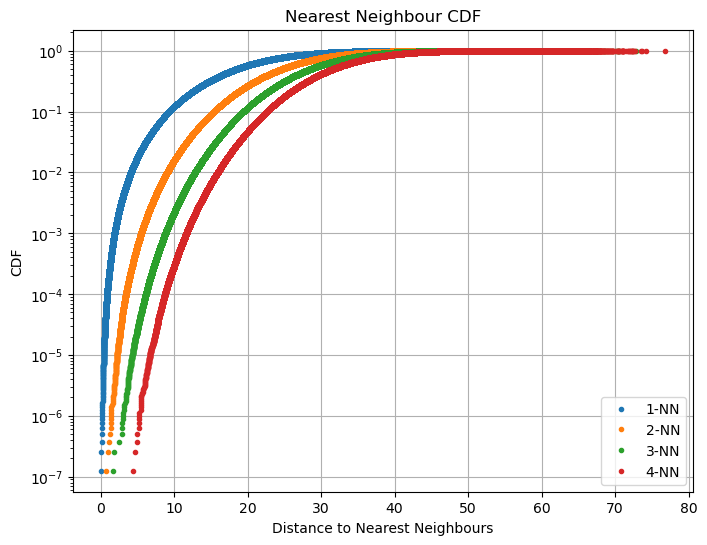

In [42]:
tree_low = cKDTree(numpy_array_low)
plt.figure(figsize=(8, 6))

for k in range(1,5):
    if k==1:
        distances, _ = tree_low.query(query_points, k=k)
        sorted_distances = np.sort(distances[:])
        plt.plot(sorted_distances, cumulative_prob, marker='.', linestyle='none', label=f"{k}-NN")
    else:
        distances, _ = tree.query(query_points, k=k)
        sorted_distances = np.sort(distances[:,k-1])  # k-1 to access the k-NN distance
        plt.plot(sorted_distances, cumulative_prob, marker='.', linestyle='none', label=f"{k}-NN")

plt.xlabel("Distance to Nearest Neighbours")
plt.yscale('log')
plt.ylabel("CDF")
plt.title("Nearest Neighbour CDF")
plt.legend()
plt.grid()
plt.show()